Makeing a  separate file for all my images.

In [1]:
import shutil
import os
file = './ADNI'
new_path = 'Something'
def check_file(file_path):
    dst = 'Something'
    if file_path.endswith('nii'):
        shutil.move(file_path, dst)
    else:
        if (file_path.endswith('.DS_Store') == False):
            sub_folders = os.listdir(file_path)
            for sub_folder in sub_folders:
                new_path = file_path + '/' + sub_folder
                check_file(new_path)

In [ ]:
check_file(file)

Renaming the images in the folder the their client id

In [2]:
def rename_image(folder):
    if (folder.endswith('.DS_Store') == False):
            images = os.listdir(folder)
            for image in images:
                name = image
                name_list = name.split('_')
                new_path = folder + '/' + name_list[-1]
                old_path = folder + '/' + image
                os.rename(old_path, new_path)

In [ ]:
rename_image(new_path)

Defining a function to read in the pictures

In [3]:
def get_image(subject):
    path = 'Something/' + subject
    image = sitk.ReadImage(path)
    image = resample_img(image)
    return image

Import needed libraries

In [4]:

import SimpleITK as sitk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install dltk
from dltk.io import preprocessing
from skimage import filters

import os
!pip install nibabel
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


Upload image

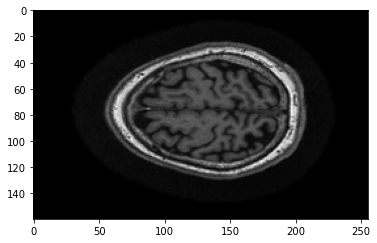

In [5]:
image = './nii_files/I30968.nii'
# load in sitk format
sitk_image = sitk.ReadImage(image)
# transform into a numpy array
img = sitk.GetArrayFromImage(sitk_image)
# check the final shape
img.shape
plt.imshow(img[:, :, 70], cmap='gray')
plt.show()

Tried to resample the image to get a different view

In [6]:
def resample_img(itk_image, out_spacing=[2.0, 2.0, 2.0]):
    ''' This function resamples images to 2-mm isotropic voxels.
      
        Parameters:
            itk_image -- Image in simpleitk format, not a numpy array
            out_spacing -- Space representation of each voxel
            
        Returns: 
            Resulting image in simpleitk format, not a numpy array
    '''
    
    # Resample images to 2mm spacing with SimpleITK
    original_spacing = itk_image.GetSpacing()
    original_size = itk_image.GetSize()

    out_size = [
        int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
        int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
        int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))]

    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    resample.SetInterpolator(sitk.sitkBSpline)

    return resample.Execute(itk_image)

/opt/anaconda3/lib/python3.8/site-packages/dltk/io/preprocessing.py:87: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad(image[slicer], to_padding, **kwargs)


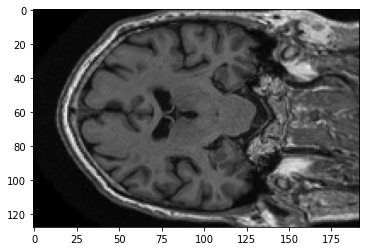

In [7]:
res = resample_img(sitk_image)
res_img = sitk.GetArrayFromImage(sitk_image)
res_img = preprocessing.resize_image_with_crop_or_pad(res_img, img_size=(128, 192, 192), mode='symmetric')
res_img = preprocessing.whitening(res_img)
plt.imshow(res_img[:, 100, :], cmap='gray')
plt.show()

Created a root path fo my images.

In [8]:
ROOT = './nii_files/'

Uploading a  single image to see how i need to slice it to best make a model.

In [9]:
t1_img = nib.load(ROOT + 'I30968.nii')

In [10]:
t1_data = t1_img.get_fdata()
t1_data

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [11]:
type(t1_data)

numpy.memmap

In [12]:
t1_img.ndim

3

Checking to see how many slices are along each axis

In [13]:
t1_img.shape

(240, 256, 160)

In [14]:
t1_data.dtype

dtype('float64')

In [15]:
print(np.min(t1_data))
print(np.max(t1_data))

0.0
1776.98486328125


Slicing the nii file across the x,y,and z axis at the median point along each axis. 

In [16]:
x_slice = t1_data[119, :, :]

In [17]:
y_slice = t1_data[:, 127, :]

In [18]:
z_slice = t1_data[:, :, 79]

Loading in those slices to examine.

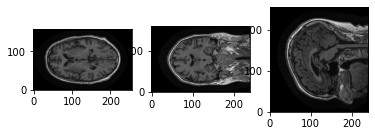

In [19]:
slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

Uploaded a CSV with patient data so i could then make a bianry column for people with AD or not includinng the MCI patients with the AD. 

In [20]:
participant_metadata = pd.read_csv('data/ADNI_descrip.csv')
participant_metadata

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I79080,136_S_1227,MCI,F,65,3,MRI,MPR; ; N3; Scaled,Processed,9/11/2007,NiFTI,NaN
1,I66824,136_S_1227,MCI,F,65,2,MRI,MPR; ; N3; Scaled,Processed,2/21/2007,NiFTI,7/28/2021
2,I99265,136_S_1227,MCI,F,66,4,MRI,MPR; ; N3; Scaled,Processed,3/06/2008,NiFTI,NaN
3,I83554,136_S_0579,MCI,F,66,4,MRI,MPR; ; N3; Scaled,Processed,6/25/2007,NiFTI,NaN
4,I119735,136_S_0579,MCI,F,66,2,MRI,MPR-R; ; N3; Scaled_2,Processed,7/10/2006,NiFTI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
415,I45126,002_S_0559,CN,M,79,2,MRI,MPR; ; N3; Scaled,Processed,6/27/2006,NiFTI,NaN
416,I40657,002_S_0413,CN,F,76,2,MRI,MPR; ; N3; Scaled,Processed,5/19/2006,NiFTI,NaN
417,I128346,002_S_0413,CN,F,77,3,MRI,MPR; ; N3; Scaled_2,Processed,11/15/2006,NiFTI,NaN
418,I118675,002_S_0413,CN,F,76,2,MRI,MPR; ; N3; Scaled_2,Processed,5/19/2006,NiFTI,NaN


In [21]:
participant_metadata['Group'].unique()

array(['MCI', 'AD', 'CN'], dtype=object)

In [22]:
def group_number(group):
    if group == 'MCI':
        result = 1
    elif group == 'AD':
        result = 1
    else:
        result = 0
    return result




participant_metadata['group_number'] = participant_metadata['Group'].apply(lambda x: group_number(x))


loaded the nii files to the csv

In [23]:
def load_nii(id):
    path = 'nii_files/' + id +'.nii';
    t1_img = nib.load(path);
    return t1_img;

participant_metadata['images'] = participant_metadata['Image Data ID'].apply(load_nii)

In [24]:
participant_metadata.head()


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,group_number,images
0,I79080,136_S_1227,MCI,F,65,3,MRI,MPR; ; N3; Scaled,Processed,9/11/2007,NiFTI,NaN,1,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
1,I66824,136_S_1227,MCI,F,65,2,MRI,MPR; ; N3; Scaled,Processed,2/21/2007,NiFTI,7/28/2021,1,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
2,I99265,136_S_1227,MCI,F,66,4,MRI,MPR; ; N3; Scaled,Processed,3/06/2008,NiFTI,NaN,1,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
3,I83554,136_S_0579,MCI,F,66,4,MRI,MPR; ; N3; Scaled,Processed,6/25/2007,NiFTI,NaN,1,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
4,I119735,136_S_0579,MCI,F,66,2,MRI,MPR-R; ; N3; Scaled_2,Processed,7/10/2006,NiFTI,NaN,1,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...


Sliced all nii files in the same spot as about and saved those slices to the csv.

In [25]:
def daxis (images):
    image_data = images.get_fdata()
    x_slice = image_data[119, :, :]
    y_slice = image_data[:, 127, :]
    z_slice = image_data[:, :, 79]
    slices = [x_slice,y_slice,z_slice]
    return slices

In [26]:
participant_metadata.iloc[0]['images']

In [27]:
participant_metadata['axis'] = participant_metadata['images'].apply(lambda x: daxis(x))

Saved the csv to use in our other notebooks. 

In [28]:
participant_metadata.to_csv('participant_metadata.csv')